# Problem 5

In [1]:
from __future__ import print_function
import time
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.fc_net import *
from data_loader import load_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver
from cs231n.classifiers.rbm import *
from cs231n.classifiers.autoencoder import *
import pickle as pickle
from visualize import plot_filters

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
data = load_data()

def plot_solver(solver):
    plt.subplot(2, 1, 1)
    plt.title('Training loss')
    plt.plot(solver.loss_history, 'o')
    plt.xlabel('Iteration')

    plt.subplot(2, 1, 2)
    plt.title('Reconstruction Cross Entropy Error')
    plt.plot(solver.train_reconstruct_error_history, '-o', label='train')
    plt.plot(solver.val_reconstruct_error_history, '-o', label='val')
    plt.plot([0.5] * len(solver.val_acc_history), 'k--')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.gcf().set_size_inches(15, 12)
    plt.show()

def plot_solver_acc(solver):
    plt.subplot(2, 1, 1)
    plt.title('Training loss')
    plt.plot(solver.loss_history, 'o')
    plt.xlabel('Iteration')

    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(solver.train_acc_history, '-o', label='train')
    plt.plot(solver.val_acc_history, '-o', label='val')
    plt.plot([0.5] * len(solver.val_acc_history), 'k--')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.gcf().set_size_inches(15, 12)
    plt.show()

## a. Basic generalization

Answer:

The reconstructed cross entropy error on validation set is little higher than in training set. When learned W is ploted as 100 28x28 images we can see the RBM do learned some useful features from images. We can see some learned patterns of edges from hand-written digits.


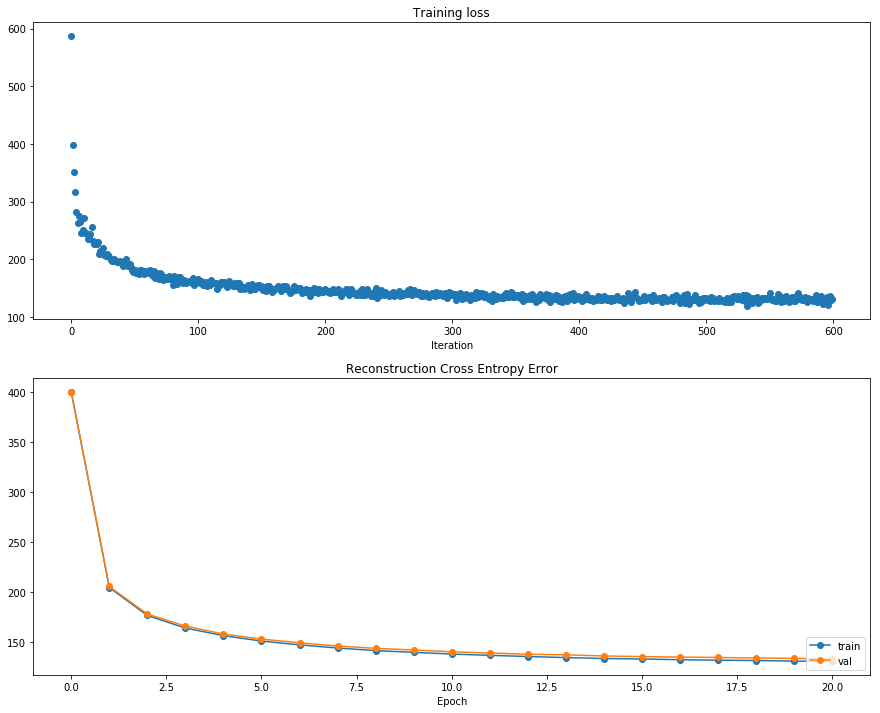

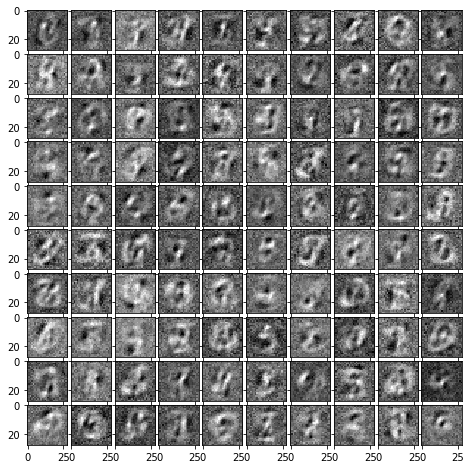

In [5]:
model1 = RBM()
solver1 = Solver(model1, data, verbose=False, update_rule='sgd', optim_config={'learning_rate': 1e-3}, print_every=50, lr_decay=0.9, num_epochs=20, batch_size=100)
solver1.train_unsupervise()
plot_solver(solver1)

weights = model1.params['W'].T
weights = weights.reshape(100, 28, 28)
plot_filters(weights)

## b. Number of CD steps

Answer:

As the experiments show below, when k increases, it didn't improve our RBM model in terms of convergence and generalization. Actually when k increase, it increases model's reconstruction cross entropy error both on training set and validation set.

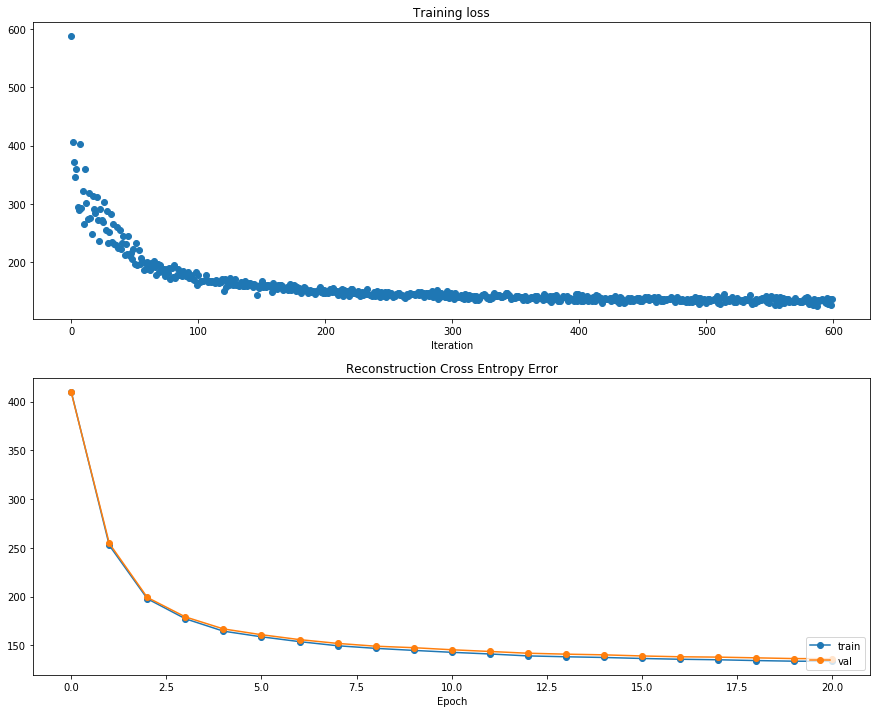

In [6]:
model2 = RBM(k=5)
solver2 = Solver(model2, data,  verbose=False, update_rule='sgd', optim_config={'learning_rate': 1e-3}, \
                 print_every=50, lr_decay=0.9, num_epochs=20, batch_size=100)
solver2.train_unsupervise()
plot_solver(solver2)


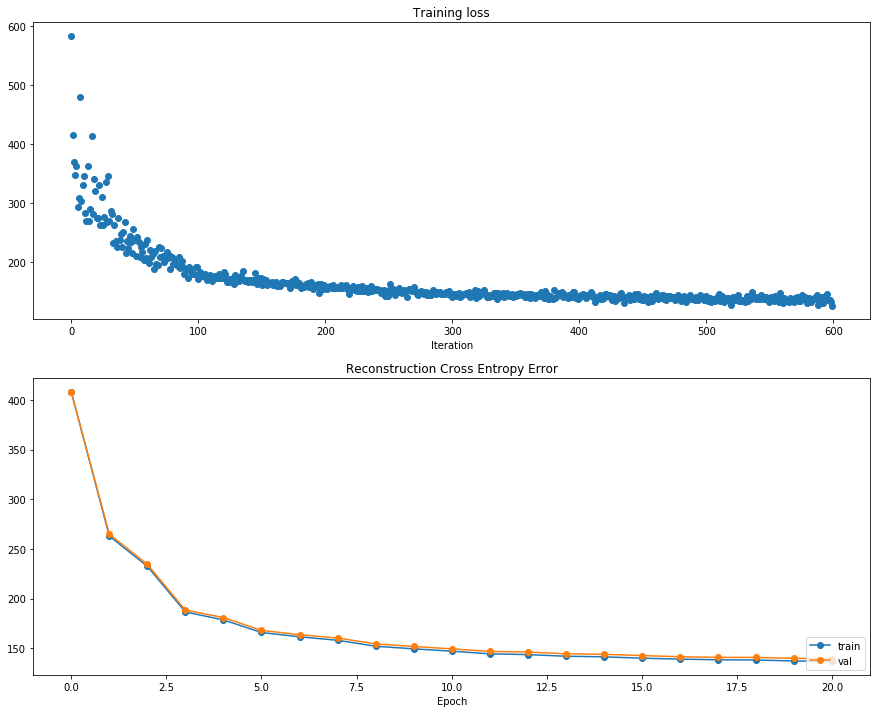

In [7]:
model3 = RBM(k=10)
solver3 = Solver(model3, data,  verbose=False, update_rule='sgd', optim_config={'learning_rate': 1e-3}, \
                 print_every=50, lr_decay=0.9, num_epochs=20, batch_size=100)
solver3.train_unsupervise()
plot_solver(solver3)

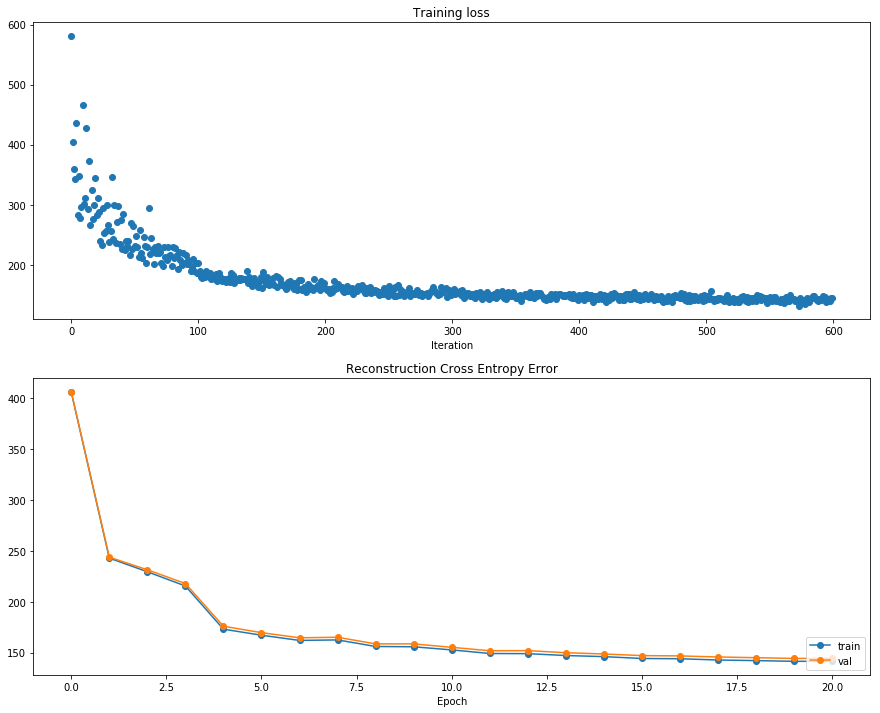

In [8]:
model4 = RBM(k=20)
solver4 = Solver(model4, data,  verbose=False, update_rule='sgd', optim_config={'learning_rate': 1e-3}, \
                 print_every=50, lr_decay=0.9, num_epochs=20, batch_size=100)
solver4.train_unsupervise()
plot_solver(solver4)

## c. Sampling from the RBM model

Answer:

The sampled images look like handwritten digits when means the RBM model do learned some useful results. Also we find 
the the 100 sampled images are very similar. Because even initial state of the image are different, but after
1000 Gibbs steps, their distribution converge to a stable distribution.

0
20
40
60
80


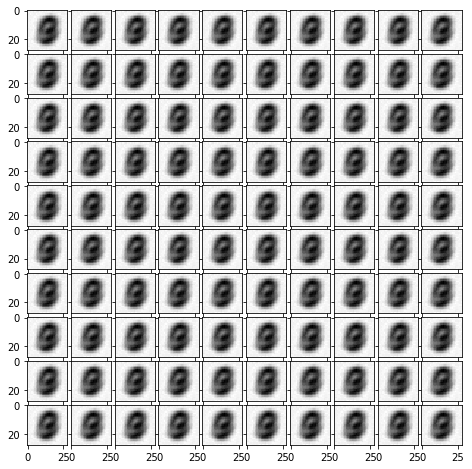

In [9]:
sampled_imgs = np.reshape(model1.sample_imgs(100),(100,28,28))
plot_filters(sampled_imgs)


## d. Unsupervised Learning as pretraining

Answer:

Using unsupervised learning as pretraining could improve model's performance. When using random initialization, the best classification accuracy on validation set is 0.832. When using RBM model's parameter as initialization, the final accuracy of the model on validation set increases to 0.851. 


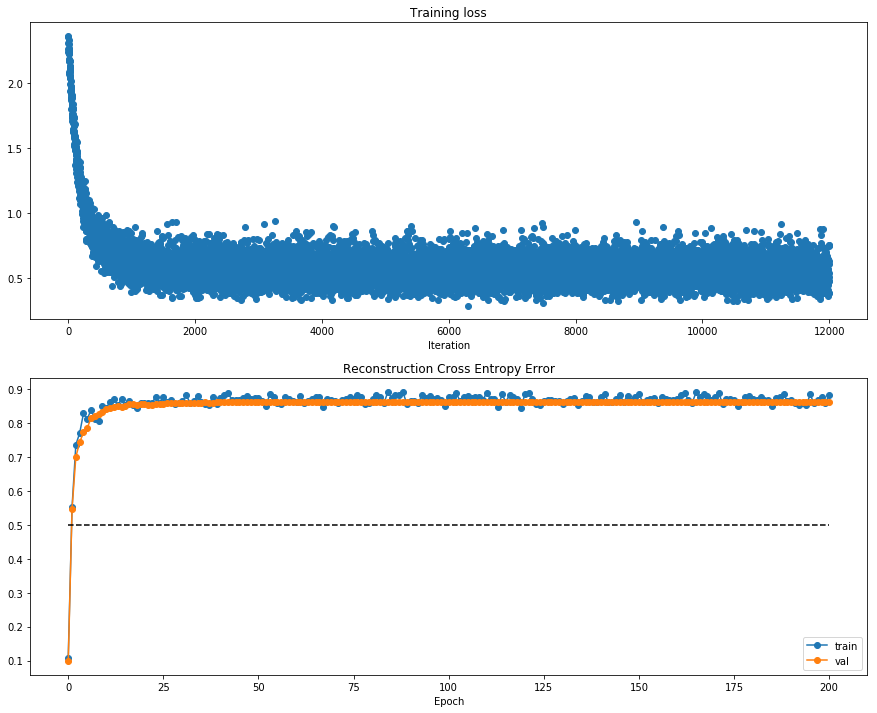

In [10]:
import pickle as pickle
from cs231n.classifiers.fc_net import *

checkpoint = pickle.load(open('RBM_epoch_10.pkl', 'rb'))
rbm_params = checkpoint['model']

model = TwoLayerNet(input_dim=28*28, weight_scale=1e-2, init='uniform')
solver = Solver(model, data,  verbose=False, update_rule='sgd', optim_config={'learning_rate': 1e-2}, print_every=100, \
                lr_decay=0.9, num_epochs=200, batch_size=50)
solver.train()
solver.check_accuracy(data['X_test'], data['y_test'])
plot_solver_acc(solver)

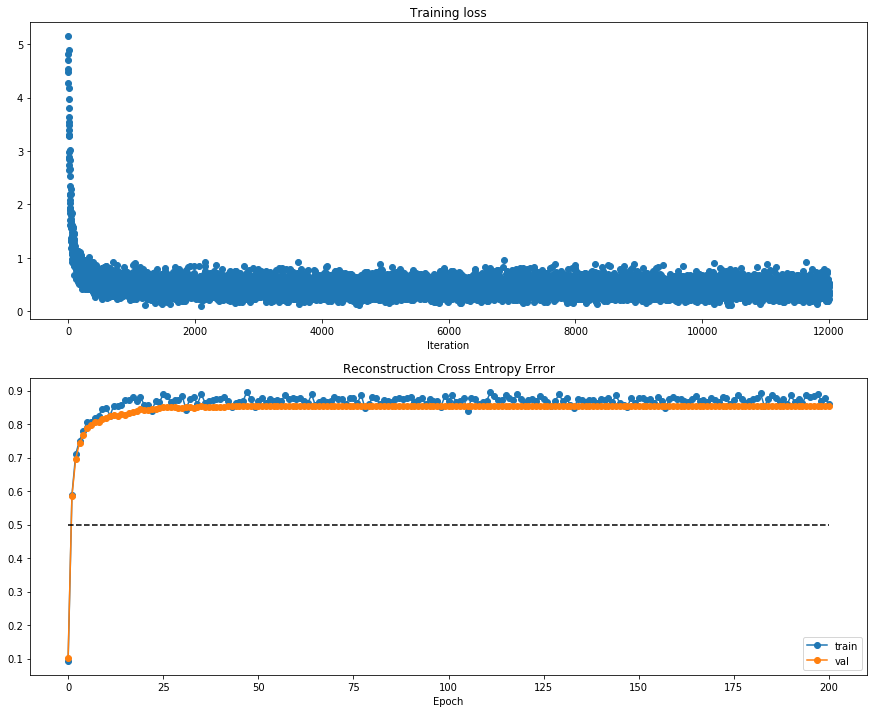

In [11]:
model = TwoLayerNet(input_dim=28*28, init='uniform')
model.params['W1'] = rbm_params['W']
solver = Solver(model, data,  verbose=False, update_rule='sgd', optim_config={'learning_rate': 1e-2}, print_every=500, \
                lr_decay=0.9, num_epochs=200, batch_size=50)
solver.train()
solver.check_accuracy(data['X_test'], data['y_test'])
plot_solver_acc(solver)

## d. Autoencoder

The figure of learned filters shows Autoencoder learned some useful features. But the filters of Autoencoder does not look good as RBM(see Section a. Basic generalization).

When using random initialization, the best classification accuracy on validation set is 0.832. When using Autoencoder model's parameter as initialization, the final accuracy of the model on validation set increases to 0.839. 


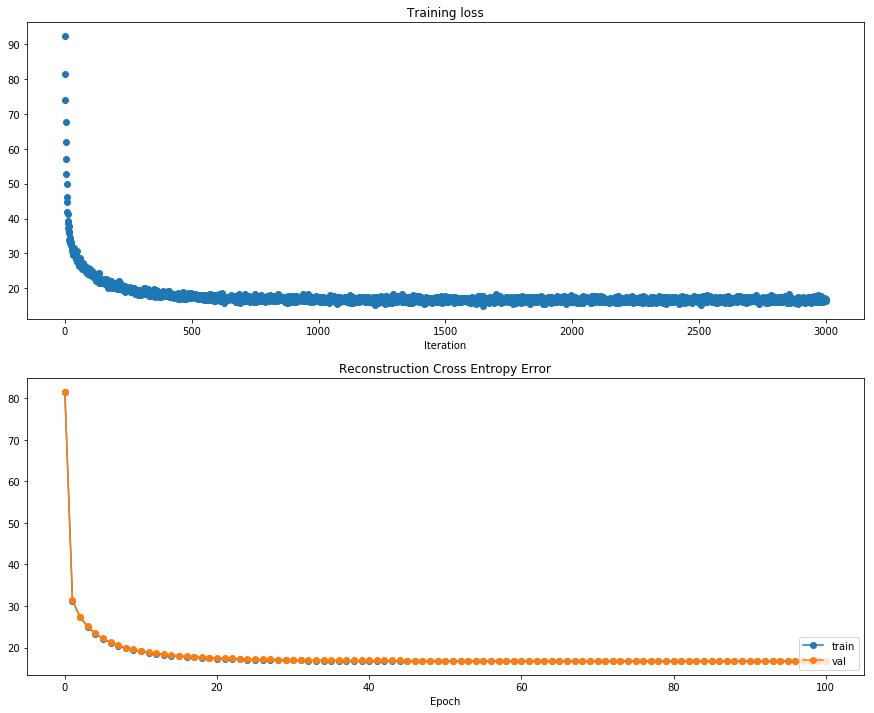

In [12]:
from cs231n.classifiers.autoencoder import *
model = Autoencoder(input_dim=28*28, weight_scale=1e-1)
solver = Solver(model, data,  verbose=False, checkpoint_name='Autoencoder', update_rule='sgd', \
                 optim_config={'learning_rate': 0.05}, print_every=500, lr_decay=0.9, num_epochs=100, batch_size=100)
solver.train_unsupervise()
plot_solver(solver)

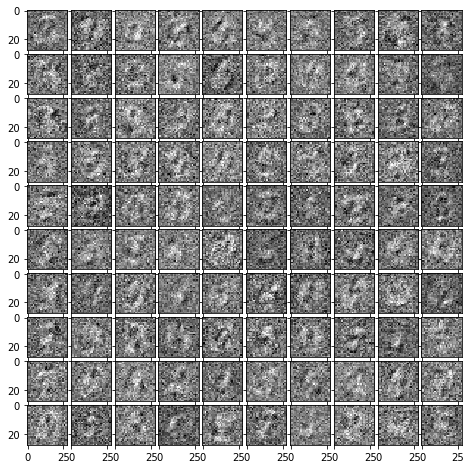

In [11]:
weights = model.params['W1'].T
weights = weights.reshape(100, 28, 28)
plot_filters(weights)

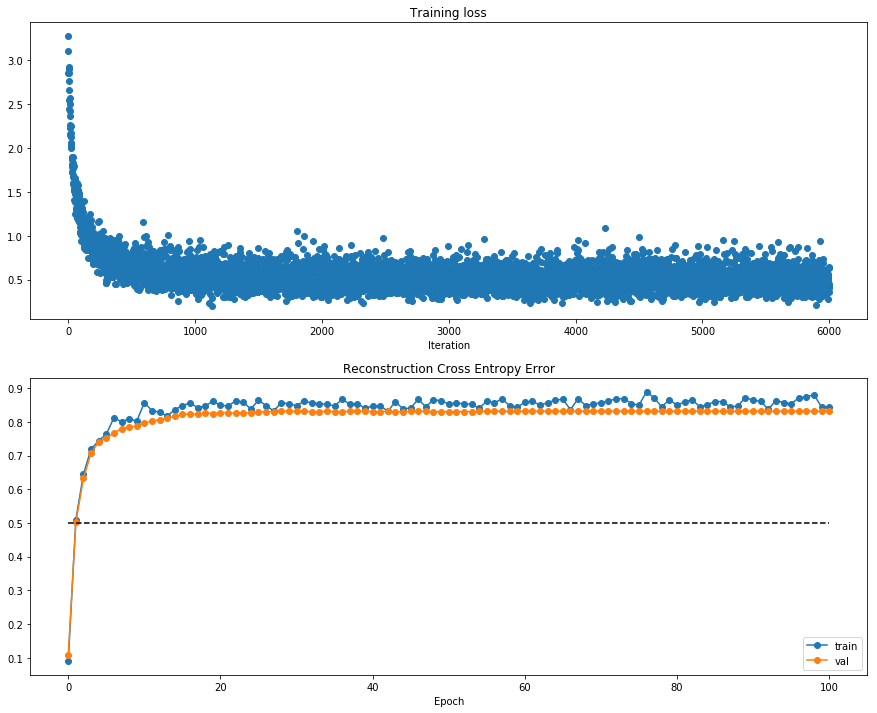

In [13]:
checkpoint = pickle.load(open('Autoencoder_epoch_200.pkl', 'rb'))
autoencoder_params = checkpoint['model']

model = TwoLayerNet(input_dim=28*28, init='uniform')
model.params['W1'] = autoencoder_params['W1']
solver = Solver(model, data,  verbose=False, update_rule='sgd', optim_config={'learning_rate': 1e-2}, print_every=500, \
                lr_decay=0.9, num_epochs=100, batch_size=50)
solver.train()
solver.check_accuracy(data['X_test'], data['y_test'])
plot_solver_acc(solver)

## f. Denoising Autoencoder

The figure of learned filters shows Denoising Autoencoder learned some useful features. But the filters of Denoising Autoencoder does not look good as RBM(see Section a. Basic generalization).

When using random initialization, the best classification accuracy on validation set is 0.832. When using Denoising Autoencoder model's parameter as initialization, the final accuracy of the model on validation set increases to 0.845.
When using as pretraining for some supervised models, the performance ranking of these models are RBM(0.851) > Denoising Autoencoder(0.845) > Authencoder(0.839). 



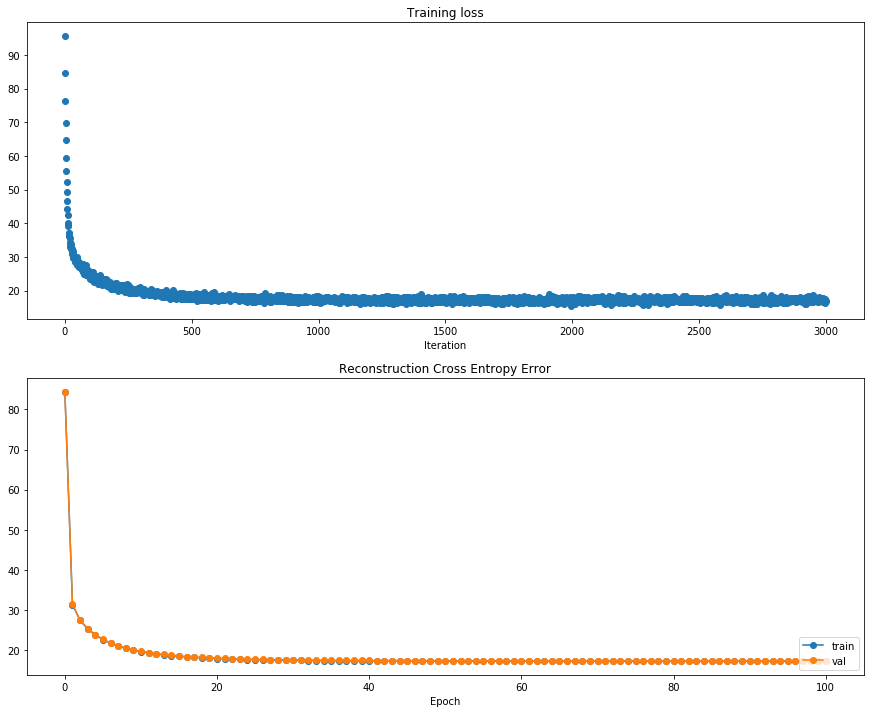

In [14]:
from cs231n.classifiers.autoencoder import *
model = Autoencoder(input_dim=28*28, weight_scale=1e-1, dropout_level=0.2)
solver = Solver(model, data,  verbose=False, checkpoint_name='DAutoencoder', update_rule='sgd', \
                 optim_config={'learning_rate': 0.05}, print_every=500, lr_decay=0.9, num_epochs=100, batch_size=100)
solver.train_unsupervise()
plot_solver(solver)

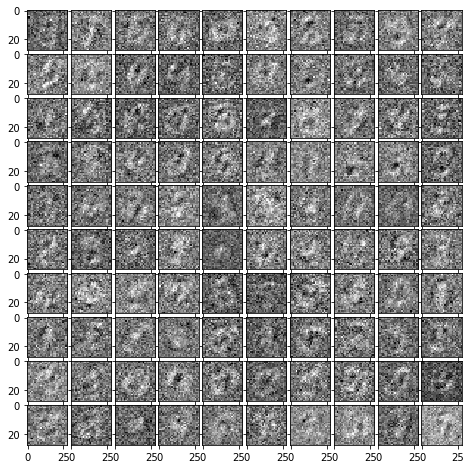

In [19]:
weights = model.params['W1'].T
weights = weights.reshape(100, 28, 28)
plot_filters(weights)

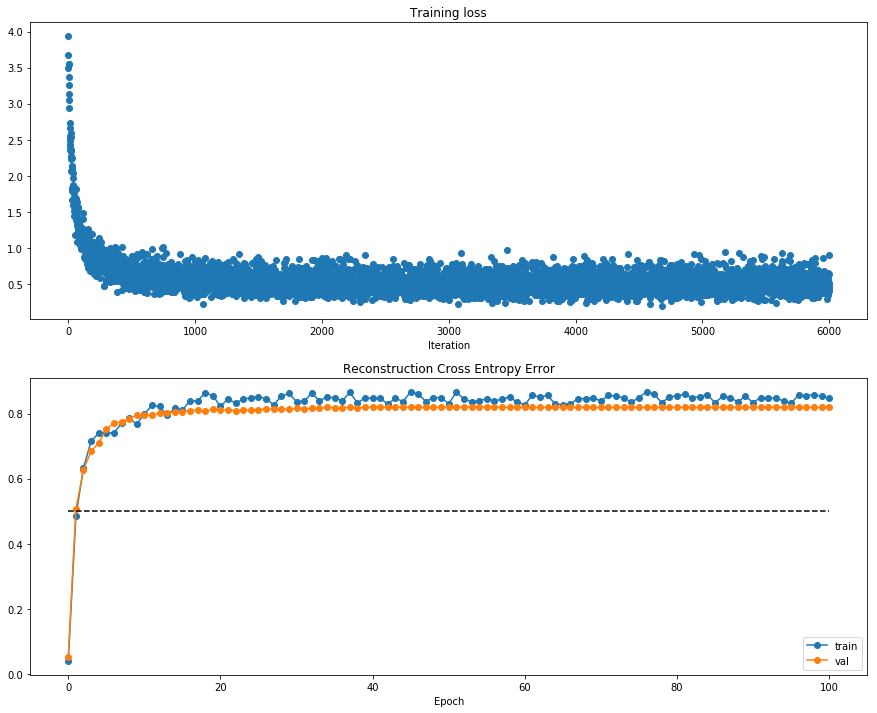

In [15]:
checkpoint = pickle.load(open('DAutoencoder_epoch_100.pkl', 'rb'))
autoencoder_params = checkpoint['model']

model = TwoLayerNet(input_dim=28*28, init='uniform')
model.params['W1'] = autoencoder_params['W1']
solver = Solver(model, data,  verbose=False, update_rule='sgd', optim_config={'learning_rate': 1e-2}, print_every=500, \
                lr_decay=0.9, num_epochs=100, batch_size=50)
solver.train()
solver.check_accuracy(data['X_test'], data['y_test'])
plot_solver_acc(solver)

## g.  Number of hidden Units

Ansewr: 

When size of hidden units increase, the reconstruction error of all models increases, both in training set and validation set. Thus, the increse the hidden units improves the convergence and generazlization of the network. However, archieve good performance in reconstruction of input does not ensure the model learned useful features. Those models are often used as pretraining for some supervised models. In this case it is not the more hidden layer the better. We should choose a value to forse the model to learn useful features so that can improve the performance of supervised models when using its parameter as initialization. 

In [16]:
rbm1 = RBM(hidden_dim=50)
rbm_solver1 = Solver(rbm1, data,  verbose=False, update_rule='sgd', optim_config={'learning_rate': 1e-3}, 、
                     print_every=50, lr_decay=0.9, num_epochs=20, batch_size=100)
rbm_solver1.train_unsupervise()
plot_solver(rbm_solver1 )

SyntaxError: invalid character in identifier (<ipython-input-16-9b50ea03934a>, line 2)

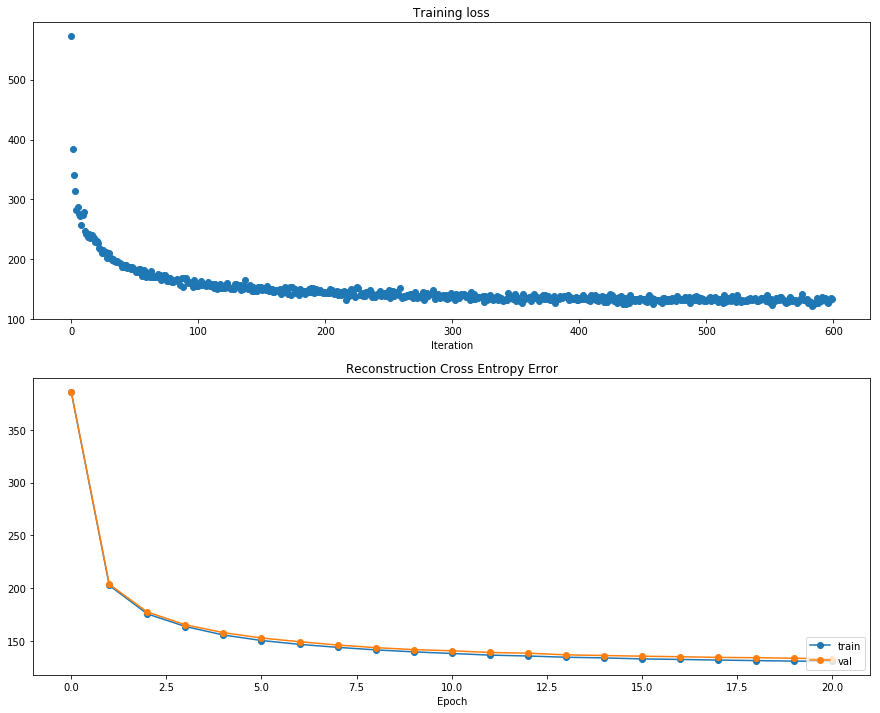

In [17]:
rbm2 = RBM(hidden_dim=100)
rbm_solver2 = Solver(rbm2, data,  verbose=False, update_rule='sgd', optim_config={'learning_rate': 1e-3}, print_every=50, lr_decay=0.9, num_epochs=20, batch_size=100)
rbm_solver2.train_unsupervise()
plot_solver(rbm_solver2 )

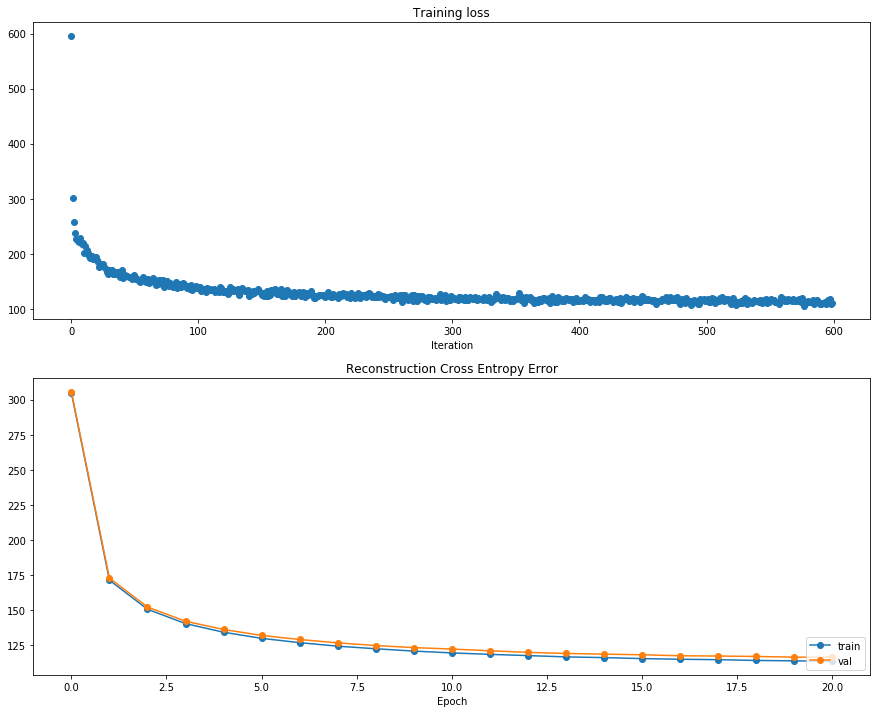

In [18]:
rbm3 = RBM(hidden_dim=200)
rbm_solver3 = Solver(rbm3, data, verbose=False,  update_rule='sgd', optim_config={'learning_rate': 1e-3}, print_every=50, lr_decay=0.9, num_epochs=20, batch_size=100)
rbm_solver3.train_unsupervise()
plot_solver(rbm_solver3 )

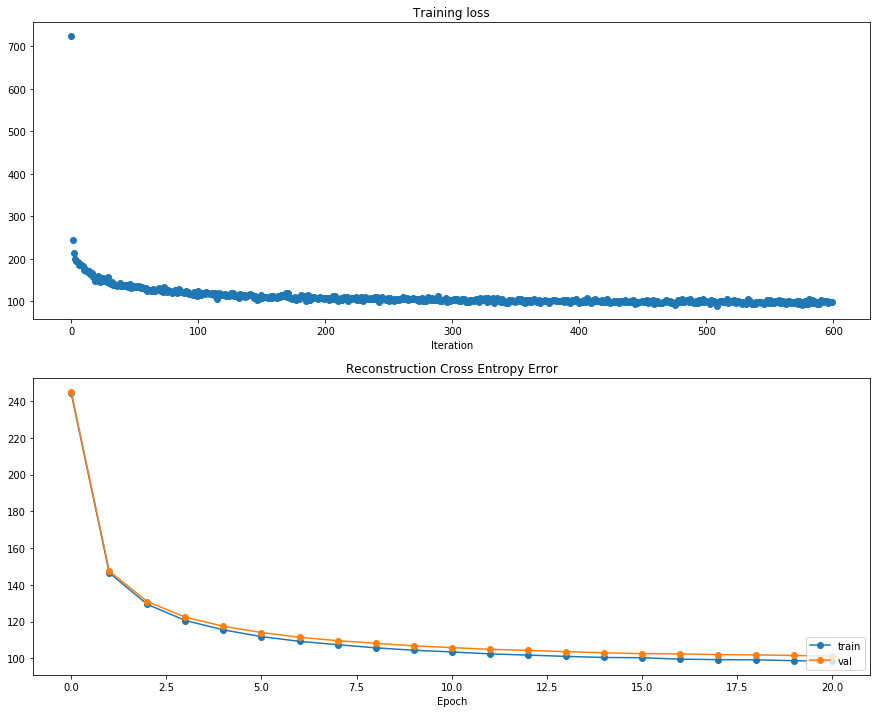

In [19]:
rbm4 = RBM(hidden_dim=500)
rbm_solver4 = Solver(rbm4, data,  verbose=False, update_rule='sgd', optim_config={'learning_rate': 1e-3}, print_every=50, lr_decay=0.9, num_epochs=20, batch_size=100)
rbm_solver4.train_unsupervise()
plot_solver(rbm_solver4 )

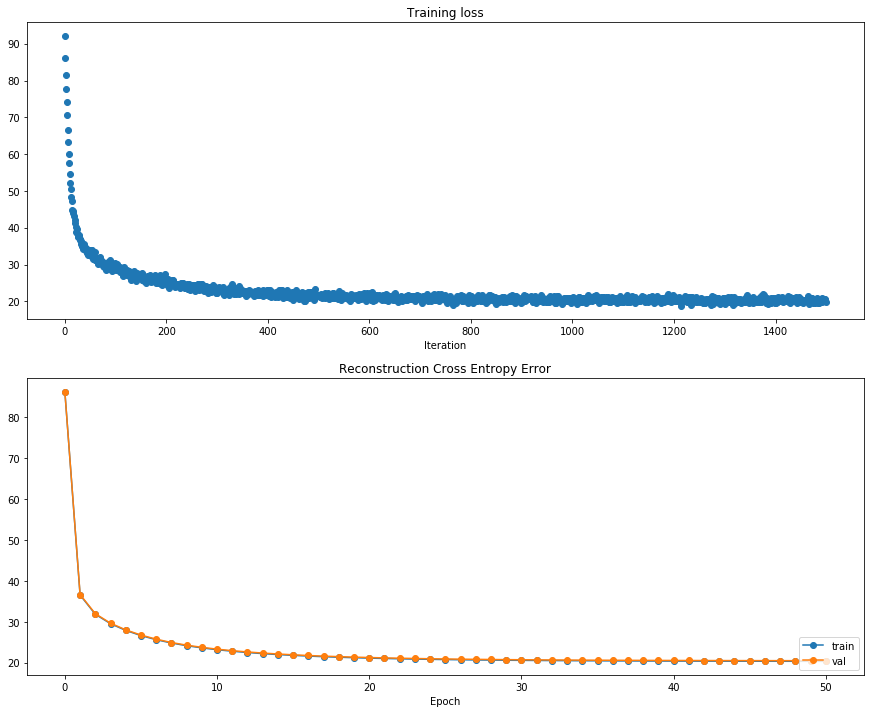

In [20]:
model = Autoencoder(input_dim=28*28, weight_scale=1e-1, hidden_dim=50)
solver = Solver(model, data, verbose=False,checkpoint_name='Autoencoder', update_rule='sgd', \
                 optim_config={'learning_rate': 0.05}, print_every=500, lr_decay=0.9, num_epochs=50, batch_size=100)
solver.train_unsupervise()
plot_solver(solver)

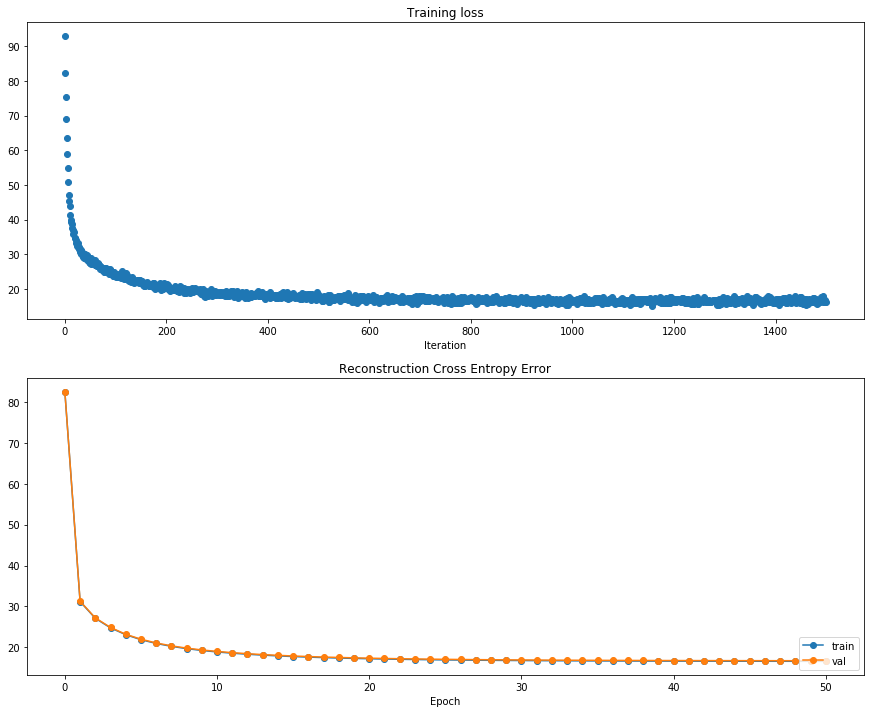

In [21]:
model = Autoencoder(input_dim=28*28, weight_scale=1e-1, hidden_dim=100)
solver = Solver(model, data, verbose=False,checkpoint_name='Autoencoder', update_rule='sgd', \
                 optim_config={'learning_rate': 0.05}, print_every=500, lr_decay=0.9, num_epochs=50, batch_size=100)
solver.train_unsupervise()
plot_solver(solver)

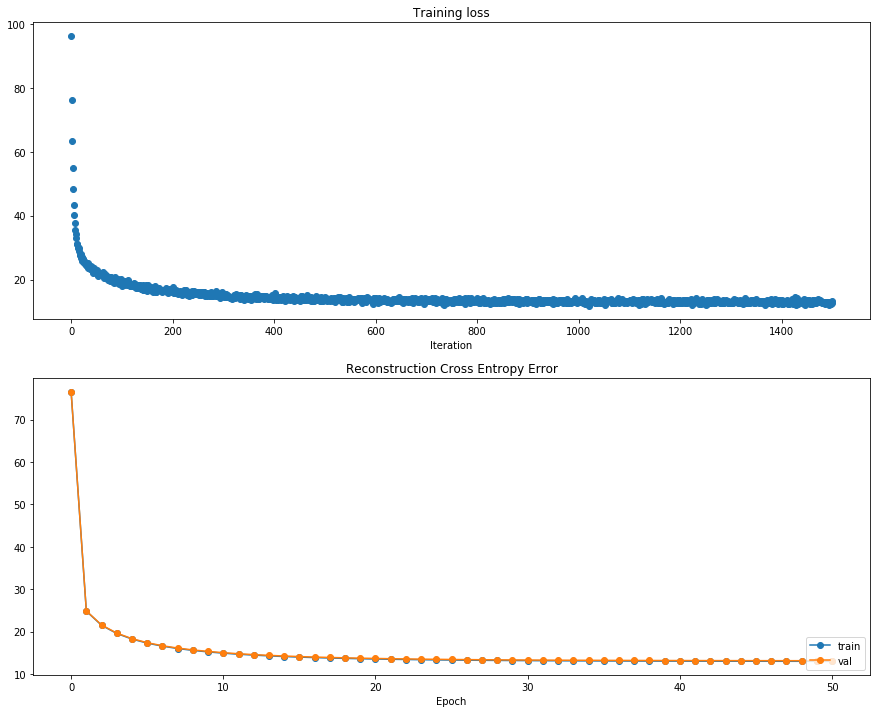

In [22]:
model = Autoencoder(input_dim=28*28, weight_scale=1e-1, hidden_dim=200)
solver = Solver(model, data, verbose=False,checkpoint_name='Autoencoder', update_rule='sgd', \
                 optim_config={'learning_rate': 0.05}, print_every=500, lr_decay=0.9, num_epochs=50, batch_size=100)
solver.train_unsupervise()
plot_solver(solver)

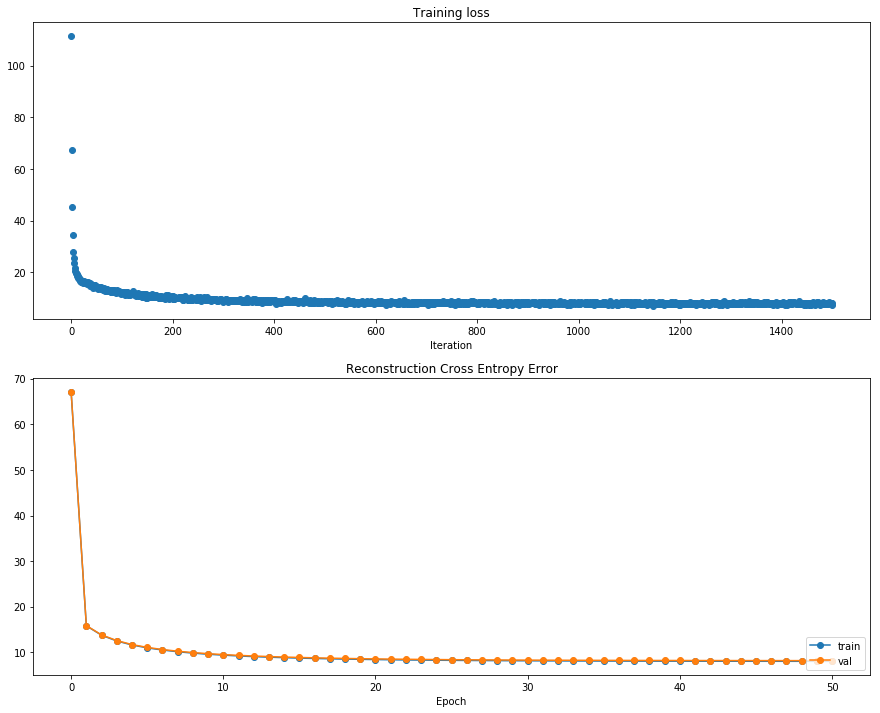

In [23]:
model = Autoencoder(input_dim=28*28, weight_scale=1e-1, hidden_dim=500)
solver = Solver(model, data, verbose=False,checkpoint_name='Autoencoder', update_rule='sgd', \
                 optim_config={'learning_rate': 0.05}, print_every=500, lr_decay=0.9, num_epochs=50, batch_size=100)
solver.train_unsupervise()
plot_solver(solver)

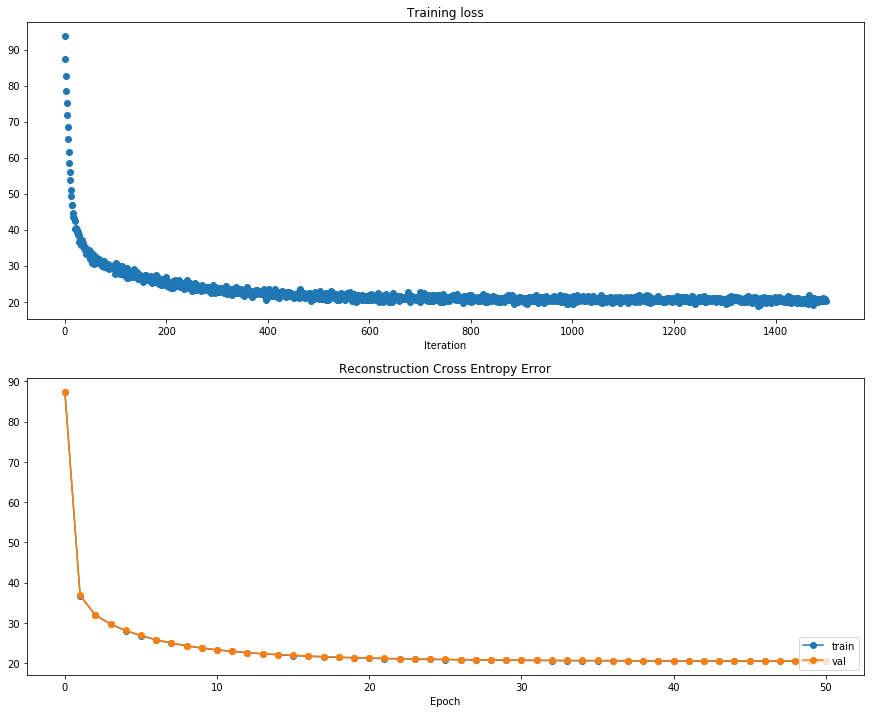

In [24]:
model = Autoencoder(input_dim=28*28, weight_scale=1e-1, hidden_dim=50, dropout_level=0.1)
solver = Solver(model, data, verbose=False,checkpoint_name='Autoencoder', update_rule='sgd', \
                 optim_config={'learning_rate': 0.05}, print_every=500, lr_decay=0.9, num_epochs=50, batch_size=100)
solver.train_unsupervise()
plot_solver(solver)

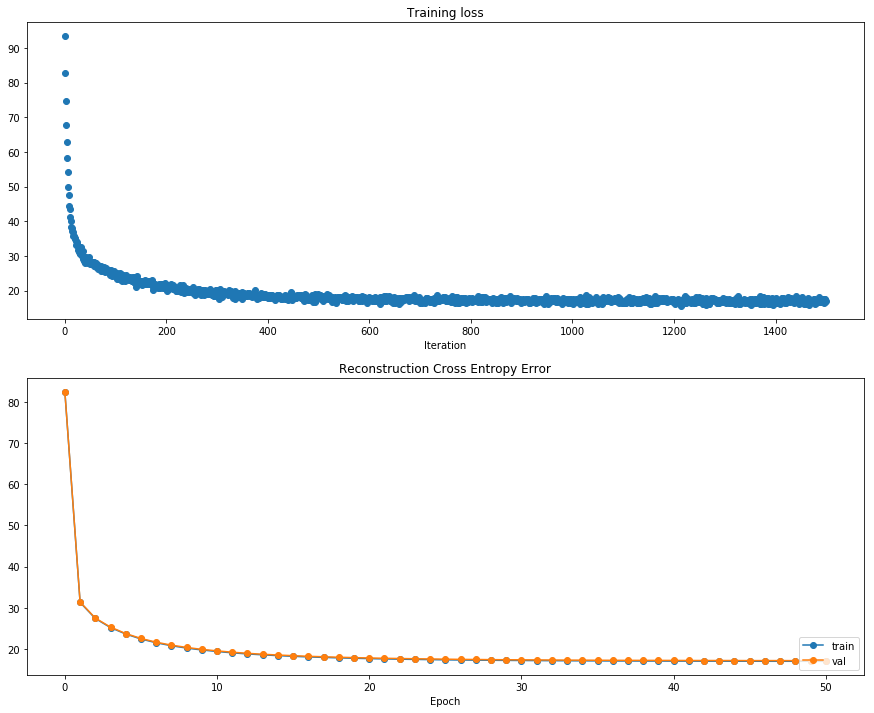

In [25]:
model = Autoencoder(input_dim=28*28, weight_scale=1e-1, hidden_dim=100, dropout_level=0.1)
solver = Solver(model, data, verbose=False,checkpoint_name='Autoencoder', update_rule='sgd', \
                 optim_config={'learning_rate': 0.05}, print_every=500, lr_decay=0.9, num_epochs=50, batch_size=100)
solver.train_unsupervise()
plot_solver(solver)

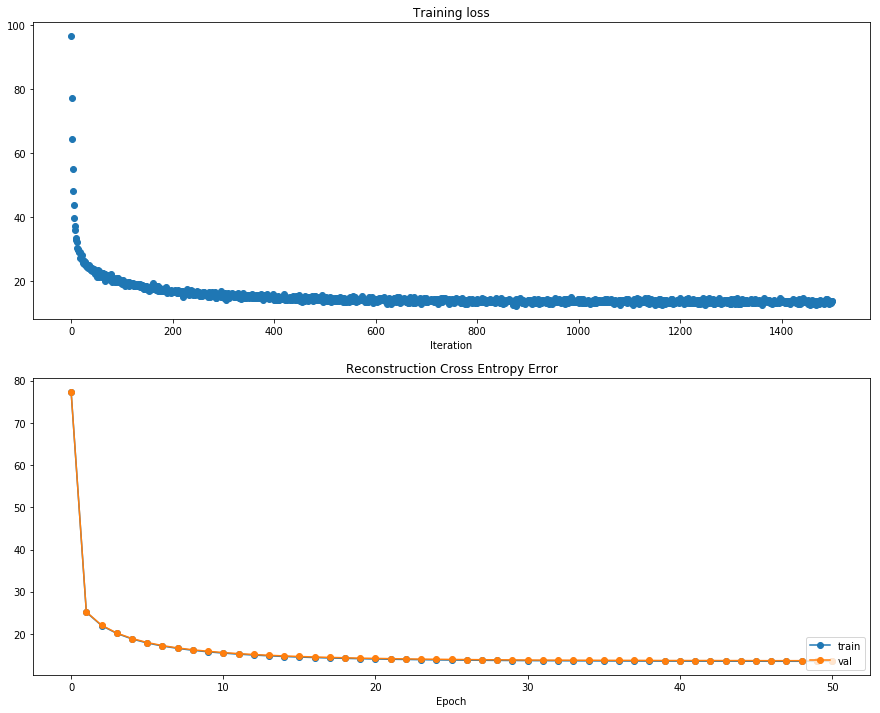

In [26]:
model = Autoencoder(input_dim=28*28, weight_scale=1e-1, hidden_dim=200, dropout_level=0.1)
solver = Solver(model, data, verbose=False,checkpoint_name='Autoencoder', update_rule='sgd', \
                 optim_config={'learning_rate': 0.05}, print_every=500, lr_decay=0.9, num_epochs=50, batch_size=100)
solver.train_unsupervise()
plot_solver(solver)

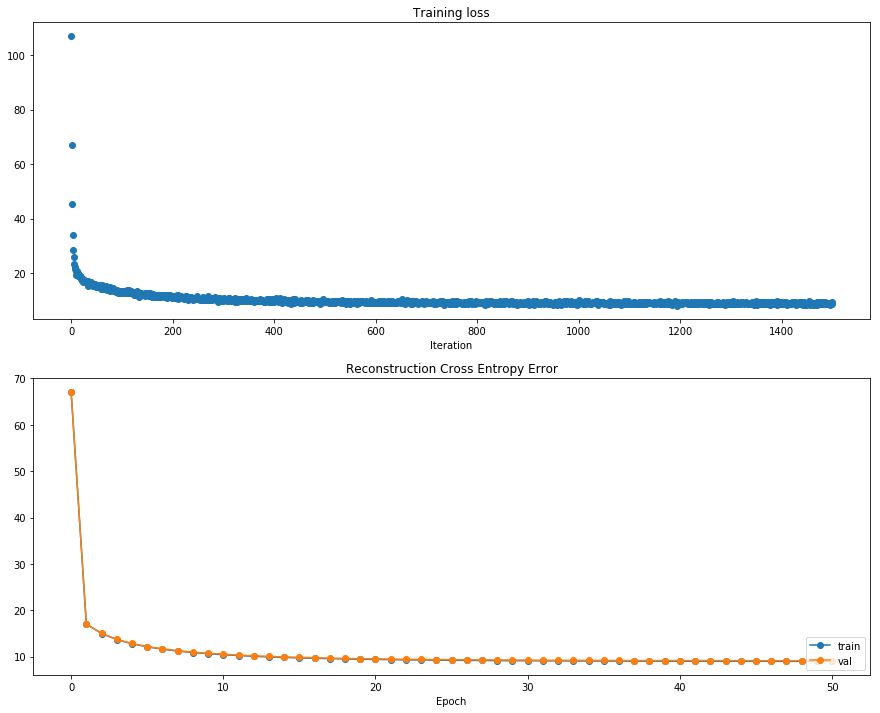

In [27]:
model = Autoencoder(input_dim=28*28, weight_scale=1e-1, hidden_dim=500, dropout_level=0.1)
solver = Solver(model, data, verbose=False,checkpoint_name='Autoencoder', update_rule='sgd', \
                 optim_config={'learning_rate': 0.05}, print_every=500, lr_decay=0.9, num_epochs=50, batch_size=100)
solver.train_unsupervise()
plot_solver(solver)